# Modèle pour déterminer des positions optimales de villes


On va modéliser notre carte comme une matrice de cases, et considérer diverses couches.

+ chaque couche va être une matrice
+ chaque matrice va contenir des scores compris entre 0 (facteur observé ayant aucun impact) et 10 (facteur ayant un impact maximal)
+ à la fin, on va multiplier les matrices par un coefficient, et faire la somme de toutes les matrices

On obtiendra une surface 3D, et on recoupera celle-ci avec un plan pour obtenir des zones d'habitabilité.

In [113]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm

In [114]:
square:int = 8
plt.rcParams['figure.facecolor'] = '#d6e4dc'

In [115]:
def plot_map(
        mat:list[list[float]],
        alph:float = 0.15,
        annotation:bool = False
) -> None:
    'Fonction pour afficher la matrice de valeurs superposée à la carte'
    h = sns.heatmap(mat, alpha=alph, zorder=2, linewidths=2, linecolor='white',annot=annotation)
    my_image = mpimg.imread("./map.png")
    h.imshow(my_image,
        aspect=h.get_aspect(),
        extent= h.get_xlim() + h.get_ylim(),
        zorder=1
    )
    if annotation:
        for t in h.texts:
            if float(t.get_text())>0:
                t.set_text(t.get_text())
            else:
                t.set_text("")
    
    plt.show()

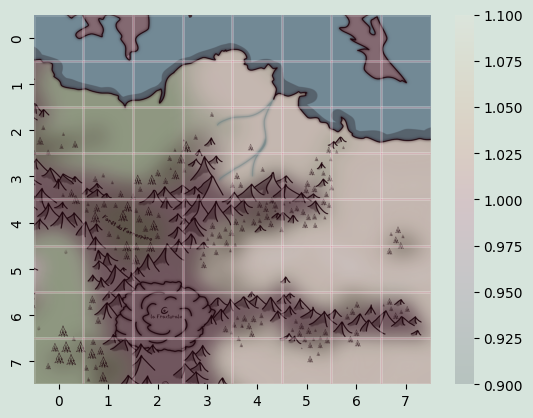

In [116]:
matrice:list[list[float]] = [[1 for i in range(square)] for i in range(square)]
matrice_empty:list[list[float]] = [[0 for i in range(square)] for i in range(square)]

plot_map(matrice)

En premier, on va initialiser les mauvaises valeurs. Ce sont les endroits où on ne peut pas placer de ville (dans mon cas, l'océan)

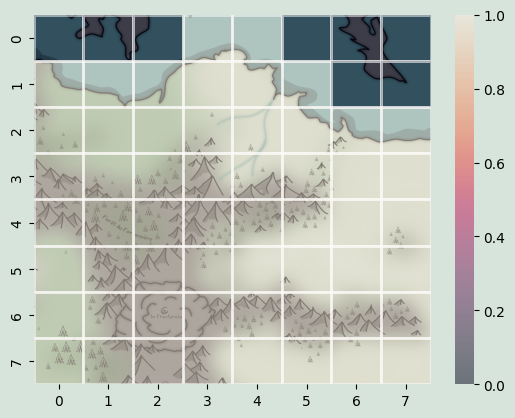

In [117]:
bad_coordinates:list[tuple] = [
    (0,0),
    (0,1),
    (0,2),
    (0,5),
    (0,6),
    (0,7),
    (1,6),
    (1,7)
]

for (x,y) in bad_coordinates:
    matrice[x][y] = 0

plot_map(matrice,.5)

Nous allons maintenant définir les différentes caractéristiques qui peuvent affecter le placement d'une ville.
+ dans cette version, les positions seront données par des séries d'assignations
+ on peut imaginer un modèle de DL pour lire l'image et en extraire cette information
+ ou un système pour encoder la carte

## Composante fluviale

Pouvoir avoir une rivière, ça offre :
+ une ressource quasi-illimitée d'eau douce
+ 

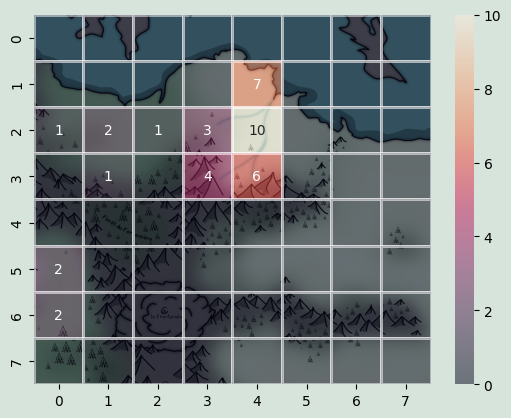

In [118]:
matrice_fleuve:list[list[float]] = [[0 for i in range(square)] for i in range(square)]

matrice_fleuve[1][4] = 7
matrice_fleuve[2][3] = 3
matrice_fleuve[2][4] = 10
matrice_fleuve[3][3] = 4
matrice_fleuve[3][4] = 6
matrice_fleuve[6][0] = 2
matrice_fleuve[5][0] = 2
matrice_fleuve[2][0] = 1
matrice_fleuve[2][1] = 2
matrice_fleuve[2][2] = 1
matrice_fleuve[3][1] = 1

plot_map(matrice_fleuve,.5,True)

score_fleuve:float = .2

## Côtes

Avoir accès aux côtes, c'est :
+ accès à une ressource en poisson
+ possibilité d'installer un commerce maritime

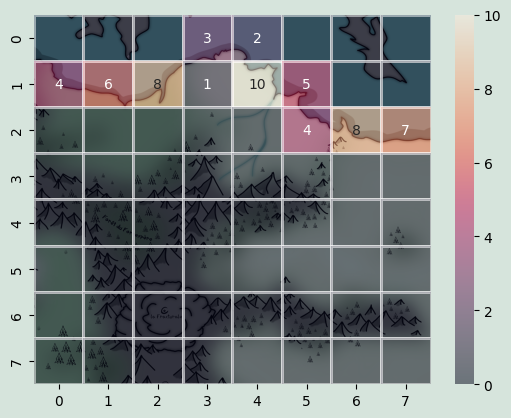

In [119]:
matrice_mer:list[list[float]] = [[0 for i in range(square)] for i in range(square)]

matrice_mer[1][0] = 4
matrice_mer[1][1] = 6
matrice_mer[1][2] = 8
matrice_mer[1][3] = 1
matrice_mer[0][3] = 3
matrice_mer[0][4] = 2
matrice_mer[1][4] = 10
matrice_mer[1][5] = 5
matrice_mer[2][5] = 4
matrice_mer[2][6] = 8
matrice_mer[2][7] = 7

plot_map(matrice_mer,.5,True)

score_mer:float = .3

## Zones forestières

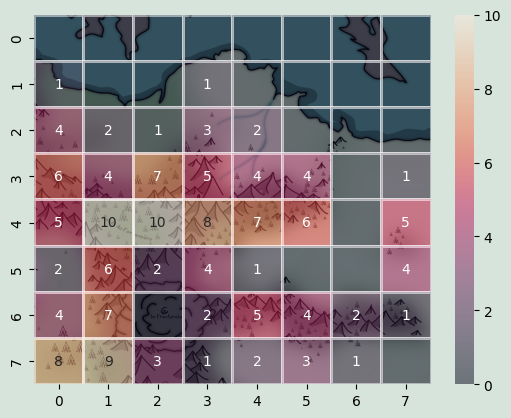

In [120]:
matrice_foret:list[list[float]] = [[0 for i in range(square)] for i in range(square)]

matrice_foret[1][0] = 1
matrice_foret[2][0] = 4
matrice_foret[3][0] = 6
matrice_foret[4][0] = 5
matrice_foret[5][0] = 2
matrice_foret[6][0] = 4
matrice_foret[7][0] = 8
matrice_foret[2][1] = 2
matrice_foret[3][1] = 4
matrice_foret[4][1] = 10
matrice_foret[5][1] = 6
matrice_foret[6][1] = 7
matrice_foret[7][1] = 9
matrice_foret[2][2] = 1
matrice_foret[3][2] = 7
matrice_foret[4][2] = 10
matrice_foret[5][2] = 2
matrice_foret[7][2] = 3
matrice_foret[1][3] = 1
matrice_foret[2][3] = 3
matrice_foret[3][3] = 5
matrice_foret[4][3] = 8
matrice_foret[5][3] = 4
matrice_foret[6][3] = 2
matrice_foret[7][3] = 1
matrice_foret[2][4] = 2
matrice_foret[3][4] = 4
matrice_foret[4][4] = 7
matrice_foret[5][4] = 1
matrice_foret[6][4] = 5
matrice_foret[7][4] = 2
matrice_foret[3][5] = 4
matrice_foret[4][5] = 6
matrice_foret[6][5] = 4
matrice_foret[7][5] = 3
matrice_foret[6][6] = 2
matrice_foret[7][6] = 1
matrice_foret[3][7] = 1
matrice_foret[4][7] = 5
matrice_foret[5][7] = 4
matrice_foret[6][7] = 1

plot_map(matrice_foret,.5,True)

score_foret:float = .2

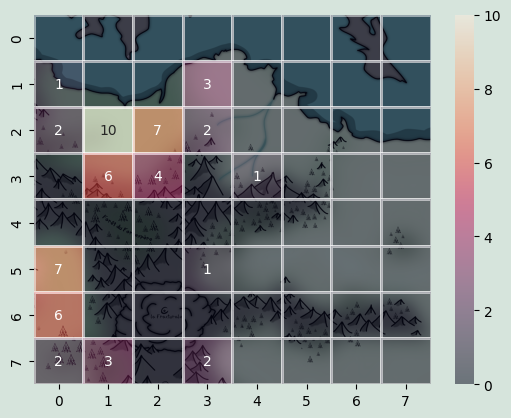

In [121]:
matrice_plaines:list[list[float]] = [[0 for i in range(square)] for i in range(square)]

matrice_plaines[1][0] = 1
matrice_plaines[2][0] = 2
matrice_plaines[5][0] = 7
matrice_plaines[6][0] = 6
matrice_plaines[7][0] = 2
matrice_plaines[2][1] = 10
matrice_plaines[2][2] = 7
matrice_plaines[3][1] = 6
matrice_plaines[3][2] = 4
matrice_plaines[1][3] = 3
matrice_plaines[2][3] = 2
matrice_plaines[7][1] = 3
matrice_plaines[7][3] = 2
matrice_plaines[5][3] = 1
matrice_plaines[3][4] = 1

plot_map(matrice_plaines,.5,True)

score_plaines:float = .4

## Steppes glacées

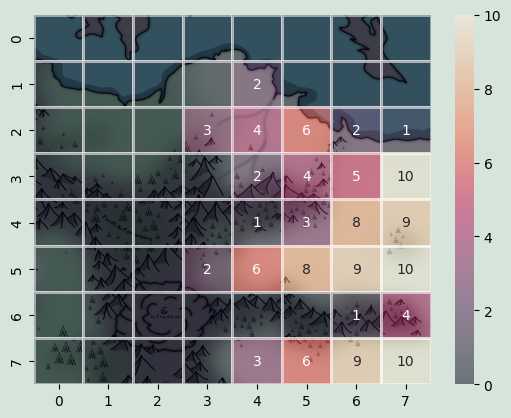

In [122]:
matrice_steppes:list[list[float]] = [[0 for i in range(square)] for i in range(square)]

matrice_steppes[1][4] = 2
matrice_steppes[2][4] = 4
matrice_steppes[2][3] = 3
matrice_steppes[3][4] = 2
matrice_steppes[2][5] = 6
matrice_steppes[3][5] = 4
matrice_steppes[3][7] = 10
matrice_steppes[4][7] = 9
matrice_steppes[5][7] = 10
matrice_steppes[6][7] = 4
matrice_steppes[7][7] = 10
matrice_steppes[7][6] = 9
matrice_steppes[7][5] = 6
matrice_steppes[7][4] = 3
matrice_steppes[5][6] = 9
matrice_steppes[5][5] = 8
matrice_steppes[5][4] = 6
matrice_steppes[5][3] = 2
matrice_steppes[6][6] = 1
matrice_steppes[4][6] = 8
matrice_steppes[2][6] = 2
matrice_steppes[2][7] = 1
matrice_steppes[3][6] = 5
matrice_steppes[4][4] = 1
matrice_steppes[4][5] = 3

plot_map(matrice_steppes,.5,True)

score_steppes:float = -.7

# Aggrégation des matrices

Dans cette partie, on va :
+ multiplier chaque matrice par un score (positif ou négatif)
+ additionner ces scores
+ multiplier par le masque pour supprimer les cases interdites

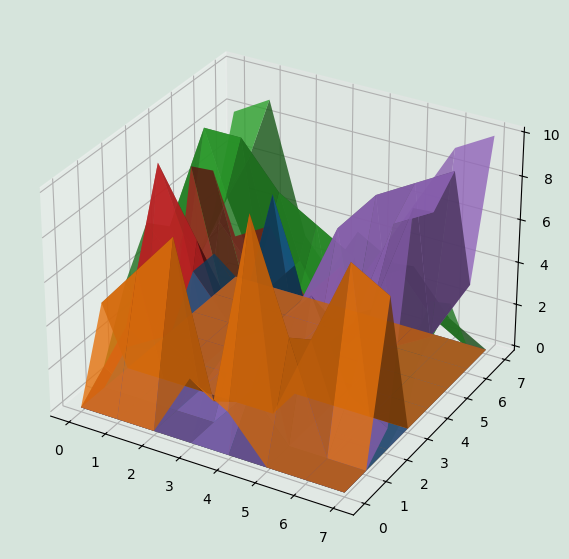

In [123]:
matrices_to_aggregate:list = [
    (matrice_fleuve,score_fleuve),
    (matrice_mer,score_mer),
    (matrice_foret,score_foret),
    (matrice_plaines,score_plaines),
    (matrice_steppes,score_steppes),
]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1, projection='3d')
a, b = np.meshgrid(list(range(square)), list(range(square)))

for (mat,score) in matrices_to_aggregate:
    array = np.array(mat)
    ax.plot_surface(a, b, array, alpha=.8)

plt.show()

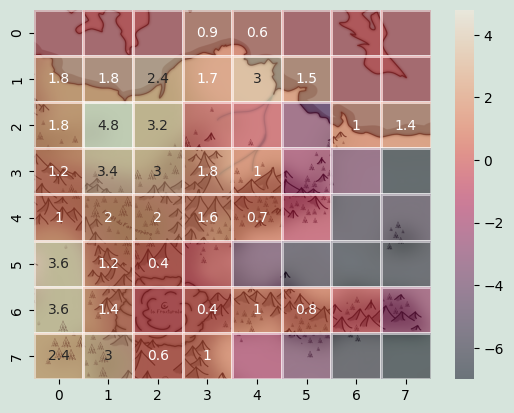

In [124]:
matrice_final:list[list[float]] = [[0 for i in range(square)] for i in range(square)]

for (mat,score) in matrices_to_aggregate:
    for x in range(square):
        for y in range(square):
            matrice_final[x][y] += matrice[x][y] * (mat[x][y]*score)

plot_map(matrice_final,.5,True)

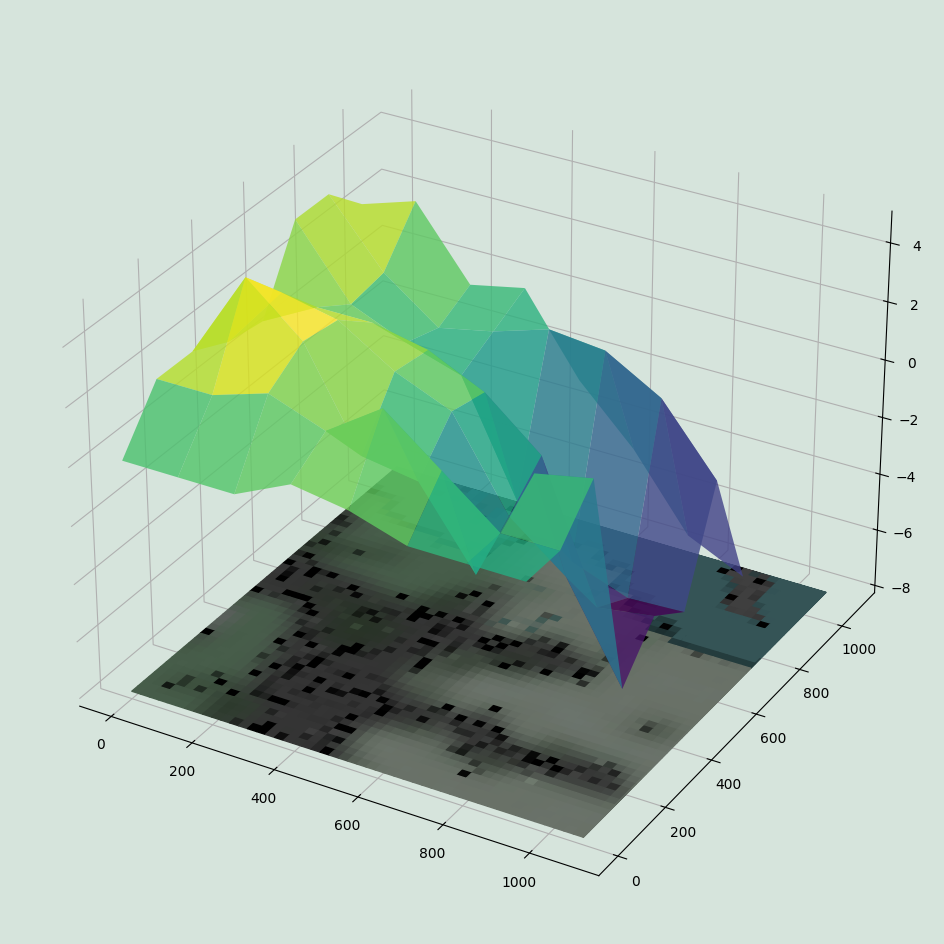

In [128]:
from matplotlib.cbook import get_sample_data
import cv2
import sys

fn = get_sample_data(sys.path[0] +"/map.png", asfileobj=False)
img = cv2.imread(fn)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
x, y = np.ogrid[0:img.shape[0], 0:img.shape[1]]
img = img / 255
img = np.rot90(img,3)

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(1,1,1, projection='3d')
interp:list = [x*(1080/square) for x in range(square)]
a, b = np.meshgrid(interp,interp )
array = np.array(matrice_final)
array_empty = np.array(matrice_empty)
ax.plot_surface(x, y, np.atleast_2d(-8), alpha=1,facecolors=img)
ax.plot_surface(a, b, array, alpha=.8,cmap=cm.viridis)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

plt.show()